# Assignment 1
## Collaborative Work from Adrian Bremer & Philipp Reinig

In [50]:
import tensorflow as tf

tf.__version__

'2.14.0'

# MNIST-Tutorial 

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

## Viewing the first date

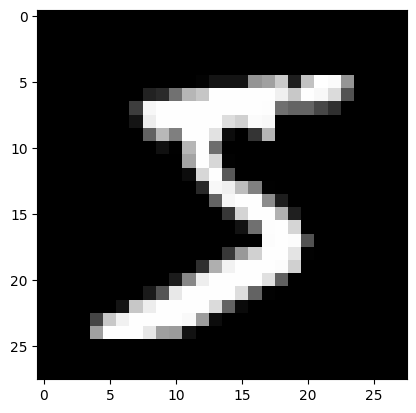

In [52]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

## Setting up and training the model

In [53]:
train_steps = 1000
learning_rate = 0.1

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))


for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

print("Done!")

Loss: 2.3025851249694824 Accuracy: 0.125
Loss: 0.5985421538352966 Accuracy: 0.8359375
Loss: 0.571887731552124 Accuracy: 0.8203125
Loss: 0.40278637409210205 Accuracy: 0.8828125
Loss: 0.4113258719444275 Accuracy: 0.90625
Starting new epoch...
Loss: 0.31796911358833313 Accuracy: 0.921875
Loss: 0.4099353551864624 Accuracy: 0.875
Loss: 0.4221712350845337 Accuracy: 0.875
Loss: 0.4087679088115692 Accuracy: 0.890625
Loss: 0.30487358570098877 Accuracy: 0.9140625
Starting new epoch...
Done!


## Testing

In [54]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9106, shape=(), dtype=float32)


# Building a Deep Model

## Hidden Layer
Using a variable size "N" for the hidden layer.
The previous layer with 10 Outputs represents the Output-Layer. 
Therefore, the hidden weights get a shape of Nx784 and the Output-Weights will get a shape of 10xN.

In [55]:
N = 20


def init_and_train(hidden_size):
    """returns the loss and accuracy after 1000 iterations"""

    # initialising weights with small random values
    # and biases with small positive values (alternatively with zeros)
    W_ih = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(784, hidden_size)).astype(np.float32))
    b_h = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=hidden_size).astype(np.float32))
    W_ho = tf.Variable(np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, 10)).astype(np.float32))
    b_o = tf.Variable(np.random.uniform(low=0.0, high=0.1, size=10).astype(np.float32))

    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            tape.watch([W_ih, b_h, W_ho, b_o])

            hidden_logits = tf.matmul(img_batch, W_ih) + b_h
            # DON'T USE SOFTMAX HERE - IT IS AWFUL!
            hidden_softmax = tf.nn.relu(hidden_logits)

            logits = tf.matmul(hidden_softmax, W_ho) + b_o
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits, labels=lbl_batch))

        grads = tape.gradient(xent, [W_ih, b_h, W_ho, b_o])
        W_ih.assign_sub(learning_rate * grads[0])
        b_h.assign_sub(learning_rate * grads[1])
        W_ho.assign_sub(learning_rate * grads[2])
        b_o.assign_sub(learning_rate * grads[3])

        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                                 tf.float32))
            #print("Loss: {} Accuracy: {}".format(xent, acc))

    #print("Done!")
    
    return (xent,acc)
    
_,_ = init_and_train(N)

Starting new epoch...
Starting new epoch...


## Find best N

Starting new epoch...
Starting new epoch...
N = 10
Starting new epoch...
Starting new epoch...
N = 11
Starting new epoch...
Starting new epoch...
N = 12
Starting new epoch...
Starting new epoch...
N = 13
Starting new epoch...
Starting new epoch...
N = 14
Starting new epoch...
Starting new epoch...
Starting new epoch...
N = 15
Starting new epoch...
Starting new epoch...
N = 16
Starting new epoch...
Starting new epoch...
N = 17
Starting new epoch...
Starting new epoch...
N = 18
Starting new epoch...
Starting new epoch...
N = 19
Starting new epoch...
Starting new epoch...
N = 20
Starting new epoch...
Starting new epoch...
N = 21
Starting new epoch...
Starting new epoch...
N = 22
Starting new epoch...
Starting new epoch...
Starting new epoch...
N = 23
Starting new epoch...
Starting new epoch...
N = 24
Starting new epoch...
Starting new epoch...
N = 25
Starting new epoch...
Starting new epoch...
N = 26
Starting new epoch...
Starting new epoch...
N = 27
Starting new epoch...
Starting new epo

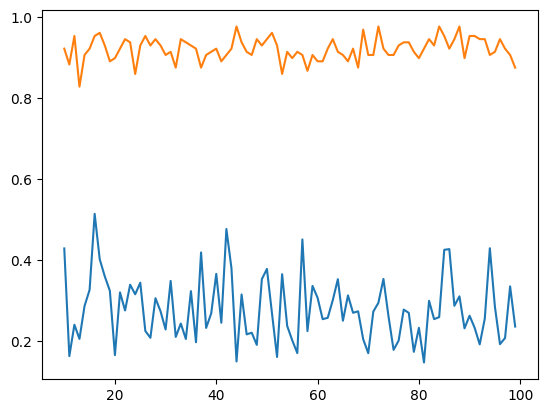

In [56]:
losses = []
accs = []
sizes = np.arange(10,100, dtype=np.int32)

for n in sizes:
    loss, acc = init_and_train(n)
    
    losses.append(loss)
    accs.append(acc)
    
    print("N = {}".format(n))
    
plt.plot(sizes, losses, label='loss')
plt.plot(sizes, accs, label='accuracy')
plt.savefig('plot.svg')
plt.show()

## Questions

### Why don't initialise with 0?
Because then the hidden layer is producing - no matter the input - the same output in the first iteration. 
And even worse: During backpropagation no weights get changed, because every needed change is multiplied by zero (in the hidden layer).

## Experiments

### Different activation functions
First we used softmax in the hidden layer. This produced a maximum accuracy of 0.5 and a minimum loss of more than 1. So we switched to ReLU for the hidden layer and we got accuracy over 90% and a loss of about 0.1

### Different hidden layer sizes
**_TODO_** 1 measure already done

### Different weight initializations
**_TODO_**


## Tensorflow Interface

### Suggestions for High-level interfaces
- initialization inside a constructor where you specify the layer sizes - probably with options to tell how to initialize 
- feed forward in one method (matrix multiplication an addition with straight forward pattern) -> for really deep networks really tidious
- use this feed forward method inside a train method -> does back propagation for the user (again: straight forward pattern)

### Wishes for currently missing features
- **_TODO_**

### redundant information
You get forced a lot to give redundant information. E.G. Specify the sizes of the matrices, but they depend on the layer sizes, specify the feed forward calculations for every single layer, even it is a mechanical task, tell the GradientTape which variables to differentiate by and subtract the changes from every single weight matrix and bias vector. 
This can easily be packaged inside the specified methods.
